# Laboratorio 1: Exploración y Visualización de Datos
Fecha: Marzo 2024

Integrantes: **AGREGUEN SUS NOMBRES COMPLETOS** y la sección de cada integrante


## Declaración de compromiso ético

Nosotros/as **AGREGUEN SUS NOMBRES COMPLETOS**, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Práctica

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio 

pio.renderers.default = 'notebook'

In [6]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)? (Recuerde adjuntar código).

In [7]:
tipos.shape

(4296, 5)

Tiene 4296 filas y 5 columnas.

2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

In [8]:
tipos[tipos.index==235]

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
235,Comunal,PALMILLA,2010,Atropello,4


La fila 235 indica que la muestra es "Comunal" y la descripción corresponde a "PALMILLA" la cual seria la comuna en donde ocurrio, el año es 2010, el tipo de accidente fue "Atropello" y la cantidad para dicho tipo de accidente corresponde a 4.

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


In [9]:
agnos = tipos["Anio"].drop_duplicates()
print(agnos)
cant_agnos = agnos.count()
print(cant_agnos)

1    2010
2    2011
Name: Anio, dtype: int64
2


Hay dos años diferentes durante el dataset, los cuales corresponden al 2010 y 2011.

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones que tuvieron más accidentes.

R: 
La región metropolitana fue la que tuvo más accidentes para el año 2011, seguida de la región de Valparaiso. La región con menos accidentes fueron las de Aisen y Atacama.

Sería más razonable realizar un conteo de frecuencias para cada comuna dentro de una región (grafico region XX, xlabel = comunas, ylabel= cantidad de accidentes). De forma de identificar si hay comunas con predominancia a accidentes y así realizar un análisis que identifique la causa, y con ello, obtener una solución al problema. (Por ejemplo realizando medidas en el transito para dicha comuna como discos pares, pasos de cebra, lomos de toros, etc.)

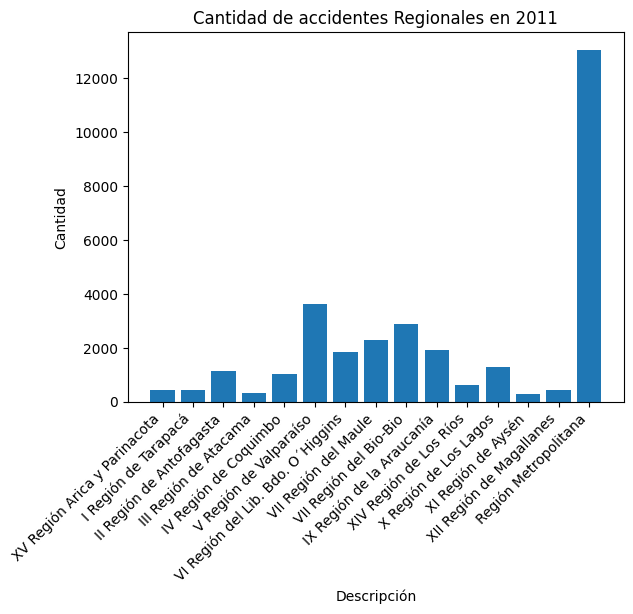

In [10]:
tipos2011 = tipos[(tipos['Muestra'] == 'Regional') &
                      (tipos['Anio'] == 2011)]

# Crear un gráfico de barras
plt.bar(tipos2011['Descripcion'], tipos2011['Cantidad'])

# Establecer etiquetas de los ejes
plt.xlabel('Descripción')
plt.ylabel('Cantidad')

# Establecer título
plt.title('Cantidad de accidentes Regionales en 2011')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

agno_2011 = tipos["Anio"==2011]
reg_2011 = agno_2011[""]

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

In [11]:
import plotly.express as px
tipos2011 = tipos[(tipos['Muestra'] == 'Regional') & (tipos['Anio'] == 2010)]
fig = px.box(tipos2011, x="Cantidad", y="TipoAccidente")
fig.show()

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

C:\Users\pbast\AppData\Local\Temp\ipykernel_109372\2174122447.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




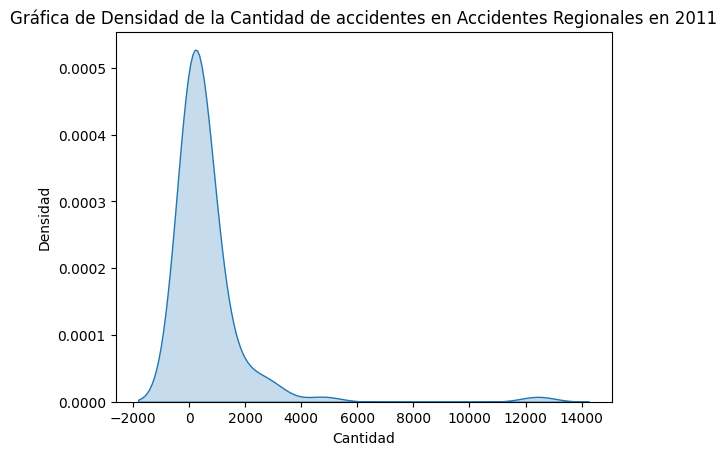

In [12]:
import seaborn as sns

# Crear la gráfica de densidad
sns.kdeplot(tipos2011["Cantidad"], shade=True)

# Establecer etiquetas de los ejes y título
plt.xlabel('Cantidad')
plt.ylabel('Densidad')
plt.title('Gráfica de Densidad de la Cantidad de accidentes en Accidentes Regionales en 2011')

# Mostrar la gráfica
plt.show()

R: Mediante el análisis de densidad se puede observar que los datos se comportan como una distribución normal desde el -2000 al 4000, y que además existe un outlier de datos desde aproximadamente el 11.000 al 14.000, teniendo un peak cerca de los 13.000.

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [13]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



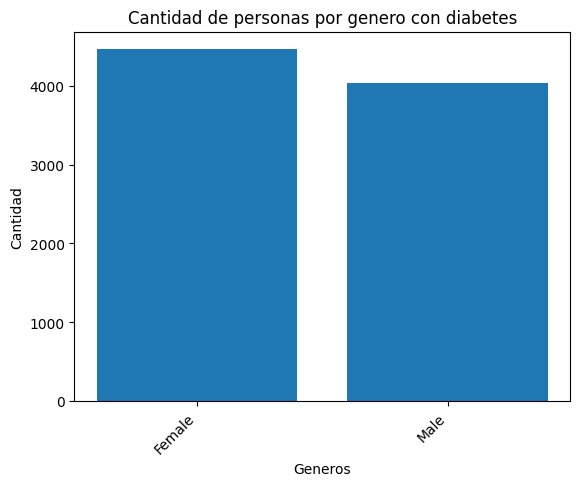

In [14]:
diabetes1 = diabetes[diabetes["diabetes"]==1]
gender_freq = diabetes1["gender"].value_counts()

# Crear un gráfico de barras
plt.bar(gender_freq.index, gender_freq.values)

# Establecer etiquetas de los ejes
plt.xlabel('Generos')
plt.ylabel('Cantidad')

# Establecer título
plt.title('Cantidad de personas por genero con diabetes')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

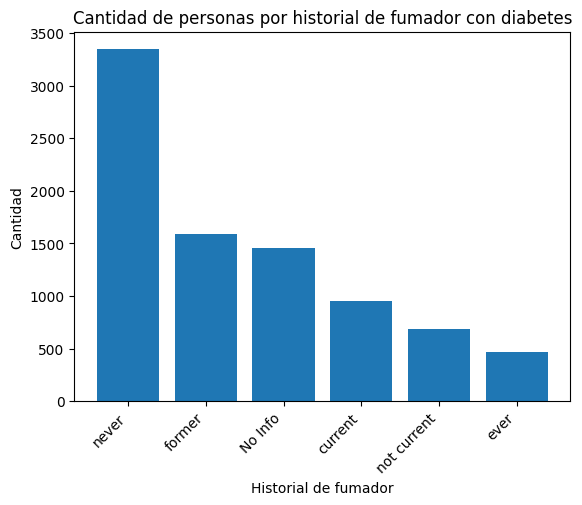

In [15]:
smokes_freq = diabetes1["smoking_history"].value_counts()

# Crear un gráfico de barras
plt.bar(smokes_freq.index, smokes_freq.values)

# Establecer etiquetas de los ejes
plt.xlabel('Historial de fumador')
plt.ylabel('Cantidad')

# Establecer título
plt.title('Cantidad de personas por historial de fumador con diabetes')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

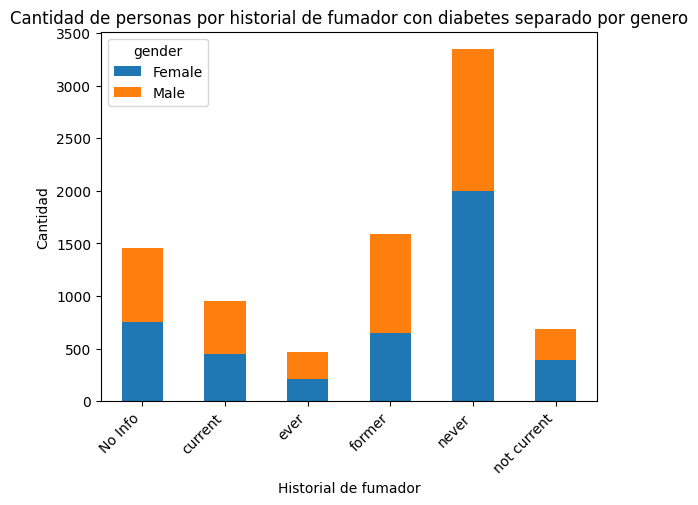

In [18]:
frequency = diabetes1.groupby(['smoking_history', 'gender']).size().unstack(fill_value=0)

# Crear un gráfico de barras
frequency.plot(kind='bar', stacked=True)

# Establecer etiquetas de los ejes
plt.xlabel('Historial de fumador')
plt.ylabel('Cantidad')

# Establecer título
plt.title('Cantidad de personas por historial de fumador con diabetes separado por genero')

# Legenda
plt.legend(title='gender')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

smoking_history  No Info  current  ever  former  never  not current
gender                                                             
Female               754      451   211     649   2002          394
Male                 700      497   261     941   1344          296


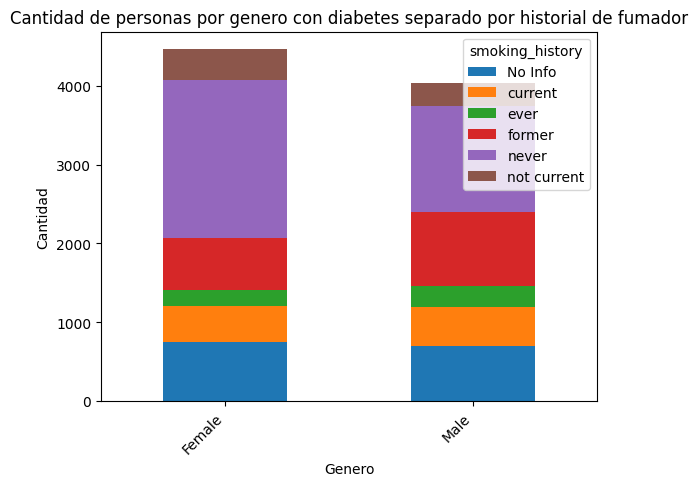

In [20]:
# Agrupar por gender y smoking_history, y contar la cantidad
frequency = diabetes1.groupby(['gender', 'smoking_history']).size().unstack(fill_value=0)
print(frequency)

# Crear un gráfico de barras
frequency.plot(kind='bar', stacked=True)

# Establecer etiquetas de los ejes
plt.xlabel('Genero')
plt.ylabel('Cantidad')

# Establecer título
plt.title('Cantidad de personas por genero con diabetes separado por historial de fumador')

# Legenda
plt.legend(title='smoking_history')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

R: Del primer gráfico se puede observar que hay ligeramente una mayor cantidad de mujeres con diabetes que de otros hombres. (app 200 mujeres más que hombres)
   
   Del segundo gráfico observamos que se tienen cercade de 1.5k datos sin información, y alrededor de 3.5k personas nunca han fumado, representando una gran mayoría de los datos analizados. Por otro lado, dentro del resto de las categorías de fumadores la mayor frecuencia se concentra en ex-fumadores seguido por fumadores actuales, con frecuencias de 1.5k y 1k respectivamente, mostrando una tendencia a dejar de fumar.

   Del gráfico 4 en particular se observa que las mujeres con diabetes representan un numero mayor dentro del total de personas que nunca han fumado, en fumadores actuales se encuentra similar a los hombres, y en ex-fumadores los hombres representan un porcentaje mayor del total de personas.

   Del tercer gráfico observamos que para las categorías 'no info', 'never' y 'not current' hay una mayor representación de parte de mujeres, y para el resto existe una frecuencia similar entre ambos géneros a excepcion de ex-fumadores, donde hay mayor cantidad de hombres.

8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

In [41]:
diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


Estadisticas de resumen por genero Femenino y masculino por historial de fumador (enfocado en las categorias fumador y ex-fumador.) y categoria de diabetes.

Feminino sin diabetes vs con diabetes: Mujeres sin diabetes tienden a fumar entre los 29-52, y tienden a ser ex-fumadoras entre los 46 a los 70.
                                       Mujeres con diabetes tienden a fumar entre los 45-65, y tienden a ser ex-fumadoras entre los 46 a los 70.

-> Independientemente de si tienen diabetes o no, dejan de ser fumadoras entre los 46-70.
-> Las mujeres con diabetes tienden a fumar 16 años más tarde que las mujeres sin diabetes, y pueden empezar a fumar hasta 13 años más tarde que las fumadoras sin diabetes.

Masculino sin diabetes vs con diabetes: Hombres sin diabetes tienden a fumar entre los 31-54, y tienden a ser ex-fumadoras entre los 46 a los 70.
                                        Hombres con diabetes tienden a fumar entre los 47-65, y tienden a ser ex-fumadoras entre los 46 a los 70.

-> Si tienen diabetes empiezan a fumar 16 años mas tarde que los hombres sin diabetes, pero también pueden empezar a fumar hasta 11 años despues que los hombres sin diabetes.
-> Independientemente de si tienen diabetes o no, tienden a ser ex-fumadores entre los 46-70

Masculino vs Femenino (sin diabetes): Los hombres sin diabetes tienden a empezar a fumar dos años despues del inicio de las mujeres sin diabetes (29 -> 31), pero también pueden empezar hasta dos años más tarde que ellas (52 -> 54). Su rango de ex-fumadores es el mismo.

Masculino vs Femenino (con diabetes): Los hombres con diabetes tienden a empezar a fumar dos años despues del inicio de las mujeres con diabetes (45 -> 47), y la última edad en que suelen empezar a fumar es la misma para ambos (65 años). Su rango de ex-fumadores es el mismo.



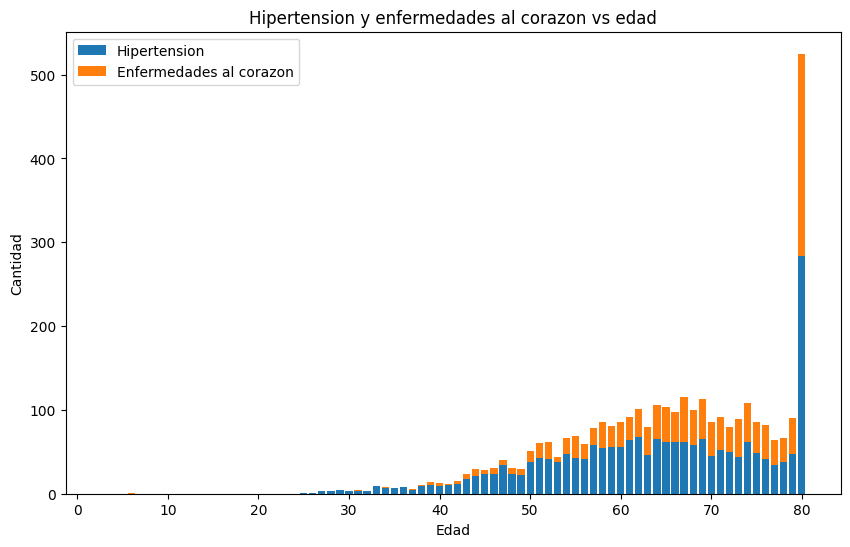

In [66]:
import plotly.express as px

# Por genero, sin diabetes
box_diabetes = diabetes[(diabetes['gender'] == 'Female') & (diabetes['diabetes'] == 0) & (diabetes['smoking_history'] == 'current') | (diabetes['smoking_history'] == 'former')]
fig = px.box(box_diabetes, x="age", y="smoking_history")
fig.update_layout(title="Boxplot de historial de fumador para mujeres sin diabetes")
fig.show()

box_diabetes = diabetes[(diabetes['gender'] == 'Male') & (diabetes['diabetes'] == 0) & (diabetes['smoking_history'] == 'current') | (diabetes['smoking_history'] == 'former')]
fig = px.box(box_diabetes, x="age", y="smoking_history")
fig.update_layout(title="Boxplot de historial de fumador para hombres sin diabetes")
fig.show()

# Por genero, con diabetes
box_diabetes = diabetes[(diabetes['gender'] == 'Female') & (diabetes['diabetes'] == 1) & (diabetes['smoking_history'] == 'current') | (diabetes['smoking_history'] == 'former')]
fig = px.box(box_diabetes, x="age", y="smoking_history")
fig.update_layout(title="Boxplot de historial de fumador para mujeres con diabetes")
fig.show()


box_diabetes = diabetes[(diabetes['gender'] == 'Male') & (diabetes['diabetes'] == 1) & (diabetes['smoking_history'] == 'current') | (diabetes['smoking_history'] == 'former')]
fig = px.box(box_diabetes, x="age", y="smoking_history")
fig.update_layout(title="Boxplot de historial de fumador para hombres con diabetes")
fig.show()

#####################

# Hipertencion y enfermedades al corazon con respecto a la edad cuando se tiene diabetes

hip_heart = diabetes[diabetes["diabetes"]==1].groupby('age')[['hypertension', 'heart_disease']].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(hip_heart['age'], hip_heart['hypertension'], label='Hipertension')
plt.bar(hip_heart['age'], hip_heart['heart_disease'], bottom=hip_heart['hypertension'], label='Enfermedades al corazon')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Hipertension y enfermedades al corazon vs edad en personas con diabetes')
plt.legend()
plt.show()

R: Se observa que para personas con diabetes, a partir de los 30's hay una predominancia por desarrollar problemas de hipertension, mientras que las enfermedades al corazon aumentan paulatinamente a partir de los 50's. También es posible observar que estas enfermedades se disparan en numero a los 80 años con respecto a edades anteriores.